In [3]:
#Technical support data analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [10]:
data=pd.read_csv('technical_support_data.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [12]:
data.shape

(23, 8)

In [13]:
data.isnull().values.any()

np.False_

In [15]:
data.describe()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,142.782609,1.973913,63.000000,0.137826,0.100000,69.956522,30.043478
std,155.098197,0.982676,58.877376,0.118627,0.182109,37.350281,37.350281
min,3.000000,1.000000,5.000000,0.010000,0.000000,5.000000,0.000000
25%,23.500000,1.150000,17.000000,0.025000,0.000000,55.000000,0.000000
50%,72.000000,2.000000,35.000000,0.140000,0.000000,90.000000,10.000000
75%,211.500000,2.300000,128.500000,0.235000,0.130000,100.000000,45.000000
max,520.000000,4.300000,180.000000,0.350000,0.700000,100.000000,95.000000


In [16]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [20]:
attr=data.iloc[:,1:]

In [21]:
#use apply function to call external functions
data_scaled=attr.apply(zscore)

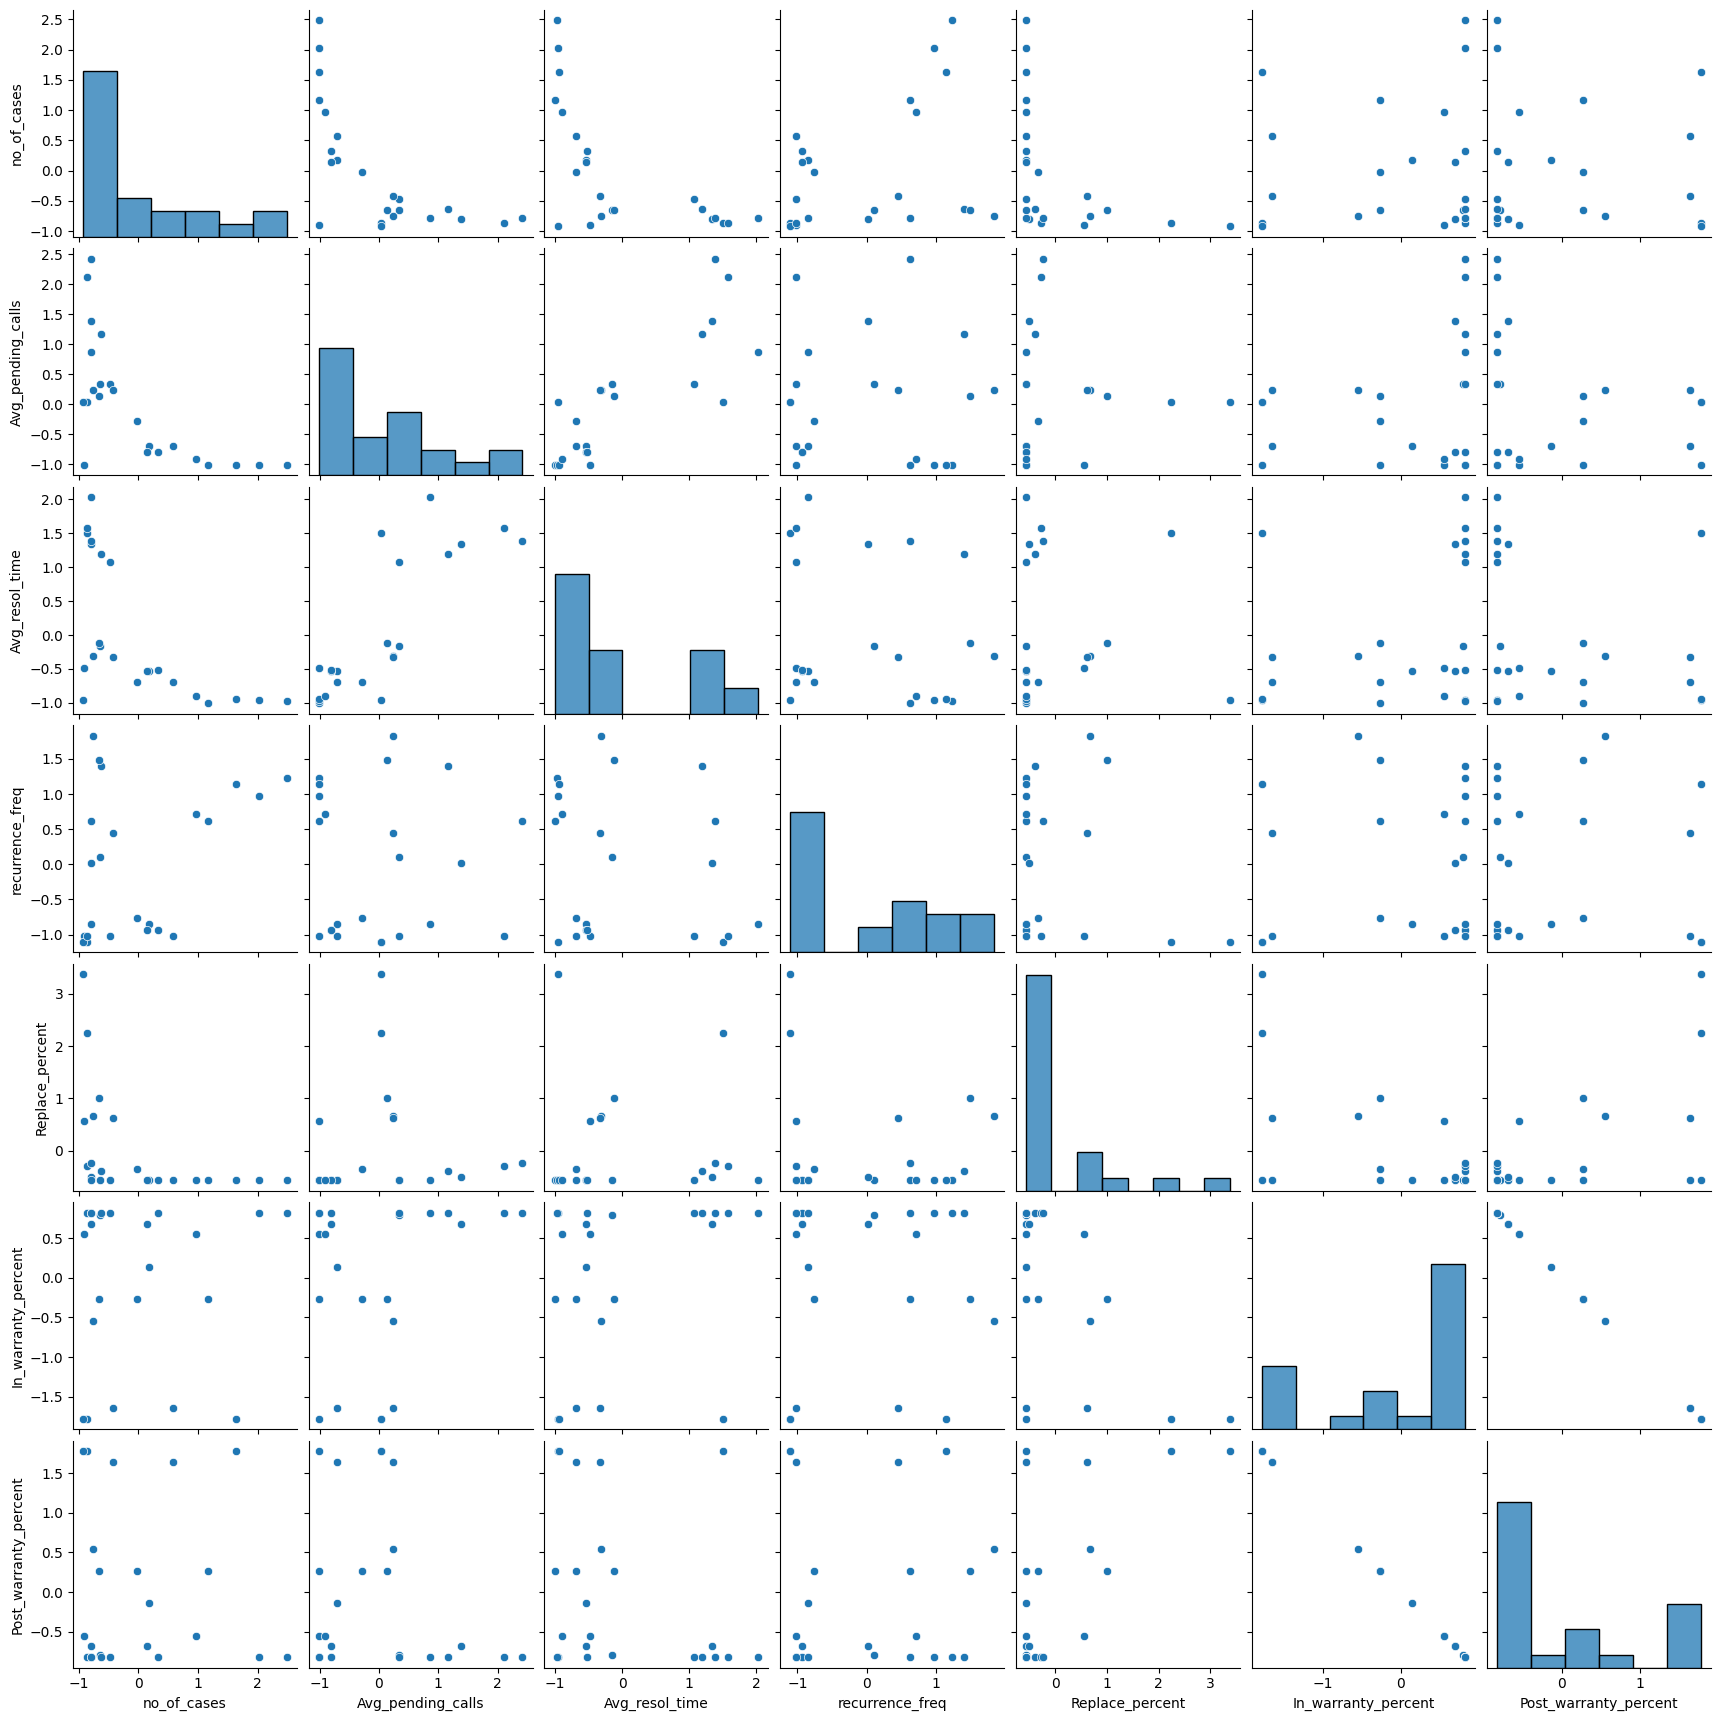

In [22]:
sns.pairplot(data_scaled)

In [23]:
#For the calculation of distance
from scipy.spatial.distance import cdist

In [24]:
clusters=range(1,10)

In [26]:
meandistortions=[]

In [28]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meandistortions.append(sum(np.min(cdist(data_scaled,model.cluster_centers_,'euclidean'),axis=1))/data_scaled.shape[0])

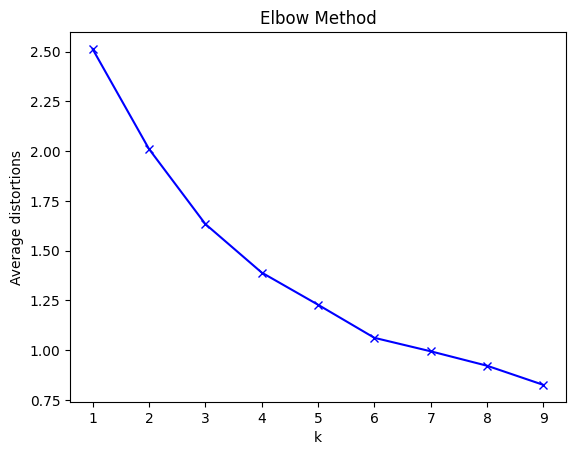

In [31]:
plt.plot(clusters,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortions')
plt.title('Elbow Method')
plt.show()

In [32]:
#k=5
model1=KMeans(5)
model1.fit(data_scaled)
prediction=model1.predict(data_scaled)

In [33]:
data_scaled['Group']=prediction

In [34]:
data_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,3
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,1
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,3
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,1
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,3


In [40]:
#Analyze the distribution of data
data_cluster=data_scaled.groupby(['Group'])
data_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,-0.721537,1.379794,1.435604,-0.139282,-0.421098,0.799636,-0.799636
1,-0.001204,-0.285007,-0.281332,-0.326033,1.021864,-1.723453,1.723453
2,1.664375,-0.987344,-0.959481,0.880663,-0.561463,0.480258,-0.480258
3,-0.152390,-0.545132,-0.489147,-0.728264,-0.336878,0.452882,-0.452882
4,-0.703957,0.183219,-0.217077,1.656395,0.842195,-0.409439,0.409439


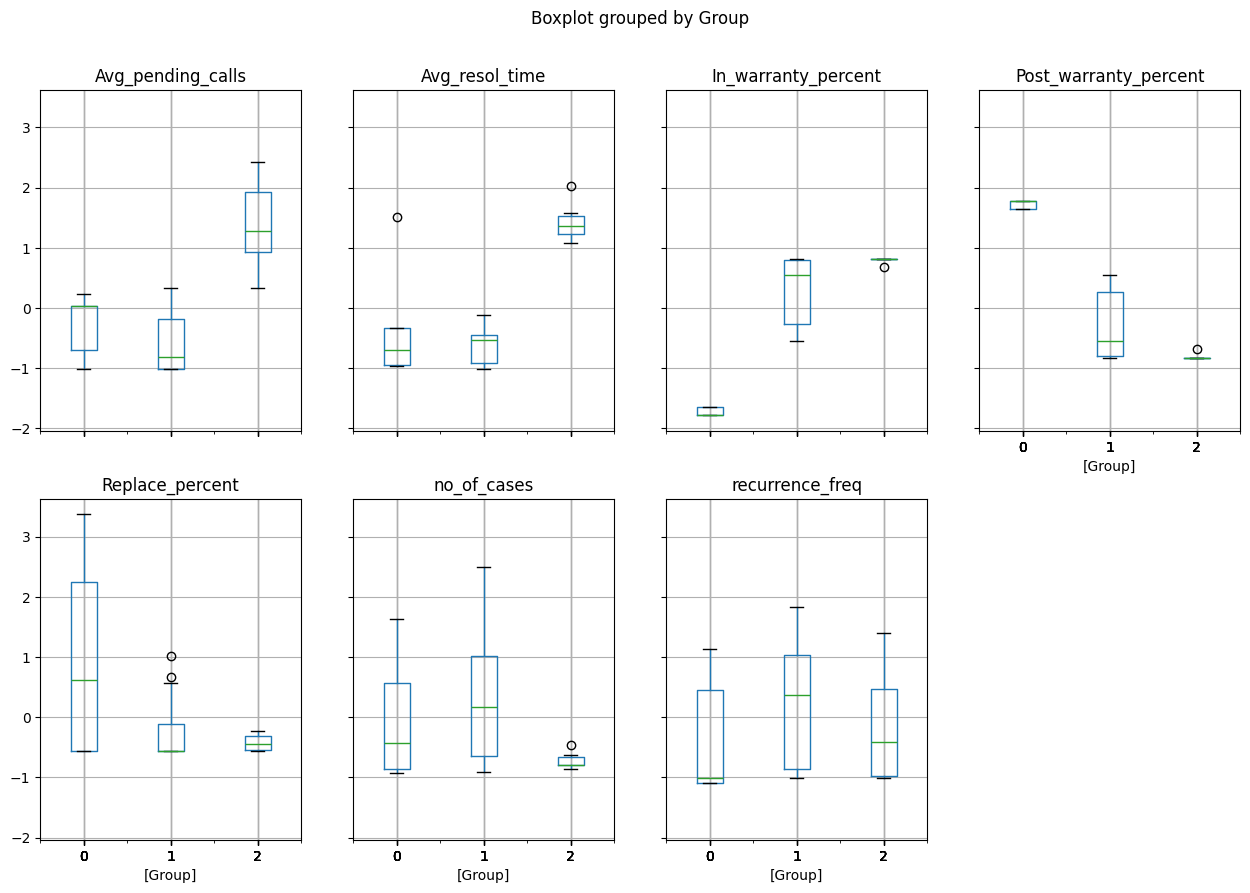

In [46]:
data_scaled.boxplot(by='Group',layout=(2,4),figsize=(15,10))
plt.show()

In [48]:
#k=3
model2=KMeans(3)
model2.fit(data_scaled)
prediction1=model2.predict(data_scaled)


In [49]:
data_scaled['Group']=prediction1

In [50]:
data_cluster=data_scaled.groupby(['Group'])
data_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,1.181479,-0.742827,-0.830103,1.070286,-0.314420,0.274943,-0.274943
1,-0.453952,0.395321,0.427475,-0.286251,-0.272094,0.557119,-0.557119
2,-0.001204,-0.285007,-0.281332,-0.326033,1.021864,-1.723453,1.723453


Disribution is more fair when k=3(faiir distribution) as compared when k=5

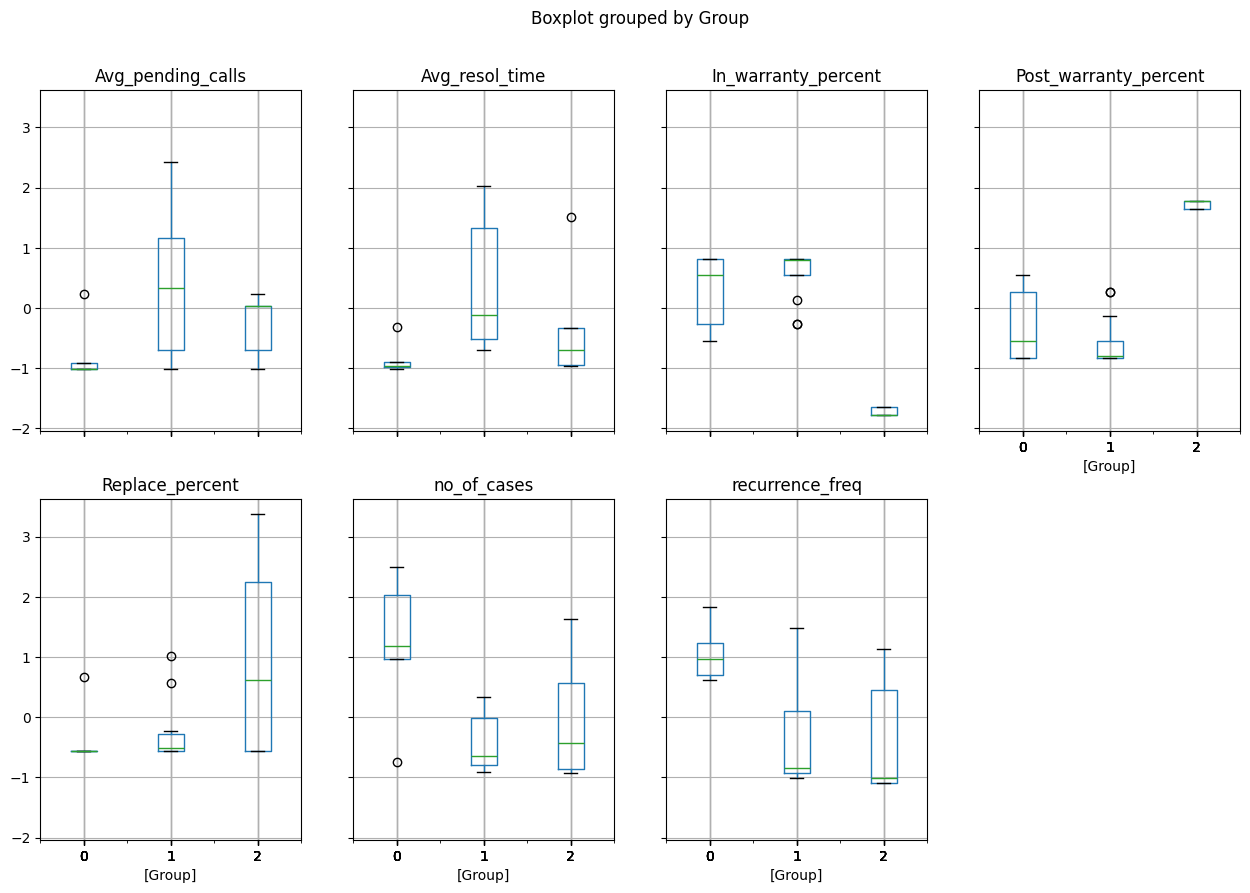

In [51]:
data_scaled.boxplot(by='Group',layout=(2,4),figsize=(15,10))
plt.show()